In [2]:
import scipy.io
data = scipy.io.loadmat('../../data/url.mat')

**create list for labels and data, where one entry is the data for the day with this index**

In [3]:
import numpy as np

num_of_days = 120
X, Y = [], []

for i in range(num_of_days):
    day_data = data["Day" + str(i)]
    X.append(day_data[0][0][0])
    Y.append(day_data[0][0][1])

**continous learn classifier**

In [5]:
# incremental learns classifier (must have partial_fit() function)
# returns an array of cumulative error rates for each day
def learn_incremental(clf, batch_size = 1000):
    
    #print("Batch size {}".format(batch_size))
    error_rates = []
    num_of_days = 120
    err = 0
    
    for curr_day in range(num_of_days): # looping through days
    
        if (curr_day != 45):
            X_curr_day = X[curr_day]
    
            # split the data in slices of batch_size
            batches_amount = int(X_curr_day.shape[0] / batch_size)
            Y_curr_day = np.array_split(Y[curr_day], batches_amount)
    
            for j in range(batches_amount): # looping through individual urls
                select_ind = np.arange(j * batch_size, (j+1) * batch_size)
        
                X_curr_url_batch, Y_curr_url_batch = X_curr_day[select_ind,:], Y_curr_day[j] 
        
                # flatten y to 1d
                Y_curr_url_batch = Y_curr_url_batch.ravel()
        
                if (j > 0):
                    Y_preds = clf.predict(X_curr_url_batch)
            
                    for k in range(batch_size):
                        if(Y_preds[k] != Y_curr_url_batch[k]):
                            err = err + 1
        
                clf.partial_fit(X_curr_url_batch, Y_curr_url_batch, classes=list(range(2))) # Continous fitting of urls and label
            
            error_rates.append(err / X_curr_day.shape[0])
            err = 0
    return error_rates

In [6]:
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state = 123)

error_rates = learn_incremental(clf, 4000)

cnt = 0
for x in error_rates:    
    print("Error-rate Day {}   : {}".format(cnt, x))
    cnt = cnt + 1

Error-rate Day 0   : 0.0275625
Error-rate Day 1   : 0.02685
Error-rate Day 2   : 0.0296
Error-rate Day 3   : 0.0437
Error-rate Day 4   : 0.0236
Error-rate Day 5   : 0.0249
Error-rate Day 6   : 0.01775
Error-rate Day 7   : 0.01835
Error-rate Day 8   : 0.01805
Error-rate Day 9   : 0.0275
Error-rate Day 10   : 0.019
Error-rate Day 11   : 0.02385
Error-rate Day 12   : 0.0175
Error-rate Day 13   : 0.01415
Error-rate Day 14   : 0.0169
Error-rate Day 15   : 0.0134
Error-rate Day 16   : 0.0211
Error-rate Day 17   : 0.01805
Error-rate Day 18   : 0.0157
Error-rate Day 19   : 0.0179
Error-rate Day 20   : 0.02135
Error-rate Day 21   : 0.0207
Error-rate Day 22   : 0.0278
Error-rate Day 23   : 0.0271
Error-rate Day 24   : 0.0215
Error-rate Day 25   : 0.0254
Error-rate Day 26   : 0.01475
Error-rate Day 27   : 0.0253
Error-rate Day 28   : 0.0208
Error-rate Day 29   : 0.0208
Error-rate Day 30   : 0.02545
Error-rate Day 31   : 0.0213
Error-rate Day 32   : 0.0174
Error-rate Day 33   : 0.0212
Error-rate D

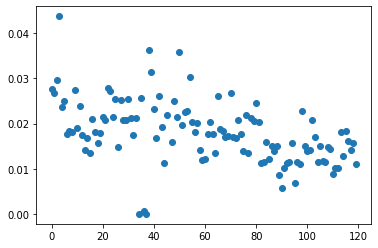

In [16]:
import matplotlib.pyplot as plt

y_indexes = np.arange(0, 120)
y_indexes = np.delete(y_indexes, 46)

plt.plot(y_indexes, error_rates, 'o');
plt.show()